NOTE: This analysis uses pickle to save dataframes. I am aware of the security risks with pickle and not being able to use the file outside of python. However, this analysis was done locally so the security risks were not a factor and all analysis was done in python. If either was not the case I would have used JSON instead. I used pickle because it was easy and fast in this case.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

#from matplotlib import style
#Seaborn's visual styling was inspired by ggplot, change matplotlib plot style to match
#style.use('ggplot')

** Open the data file created in data cleaning **

In [3]:
#read data in from pickle file
df = pd.read_pickle('C:/Users/Stacey/Downloads/NY_complaint_data_cleaned.pkl')

In [4]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,PARKS_NM,HADEVELOPT,Latitude,Longitude,CMPLNT_FR_DATE,CMPLNT_FR_DATE_YEAR,CMPLNT_FR_DATE_MONTH,BORO,CAT_OFNS,BORO_PREC
0,101109527,12/31/2015,23:45:00,NaT,nan,2015-12-31,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,NaN,NaN,40.828848,-73.916661,2015-12-31,2015,12,BRONX,FELONY-FORGERY,BRONX-44
1,153401121,12/31/2015,23:36:00,NaT,nan,2015-12-31,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,NaN,NaN,40.697338,-73.784557,2015-12-31,2015,12,QUEENS,FELONY-MURDER & NON-NEGL. MANSLAUGHTER,QUEENS-103
2,569369778,12/31/2015,23:30:00,NaT,nan,2015-12-31,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,NaN,NaN,40.802607,-73.945052,2015-12-31,2015,12,MANHATTAN,FELONY-DANGEROUS DRUGS,MANHATTAN-28
3,968417082,12/31/2015,23:30:00,NaT,nan,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,NaN,NaN,40.654549,-73.726339,2015-12-31,2015,12,QUEENS,MISDEMEANOR-ASSAULT 3 & RELATED OFFENSES,QUEENS-105
4,641637920,12/31/2015,23:25:00,2015-12-31,23:30:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,NaN,NaN,40.738002,-73.987891,2015-12-31,2015,12,MANHATTAN,MISDEMEANOR-ASSAULT 3 & RELATED OFFENSES,MANHATTAN-13


## Changes over time

Text(0.5,1,'Total Reported Crime by Year (All Boroughs)')

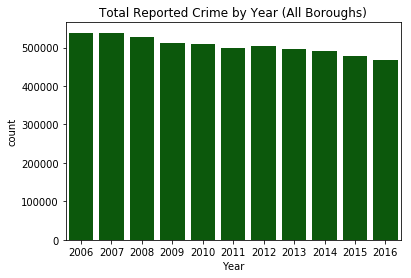

In [5]:
#count plot by year
sns.countplot(x="CMPLNT_FR_DATE_YEAR",data=df, color='darkgreen')
plt.xlabel('Year')
plt.title('Total Reported Crime by Year (All Boroughs)')

The number of reported crimes drops overall in the city between 2006 and 2016 (in terms of number of crimes reported). There is a slight uptick in 2012 vs. 2011, but otherwise crime has generally dropped.

** View crime by Borough, order display of boroughs by population size in 2016 **

In [6]:
#order Borough by 2016 populations size: 
#source: http://www1.nyc.gov/site/planning/data-maps/nyc-population/current-future-populations.page
#Brooklyn: 2,629,150, Queens: 2,333,054, Manhattan: 1,643,734, 
#Bronx: 1,455,730, Staten Island: 476,015
boro_order = ['BROOKLYN','QUEENS','MANHATTAN','BRONX','STATEN ISLAND']

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

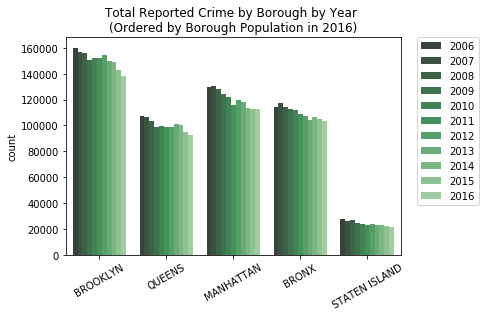

In [7]:
#count plot by borough by year
sns.countplot(x="BORO", hue="CMPLNT_FR_DATE_YEAR",
              data=df, palette='Greens_d',order = boro_order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('')
plt.title('Total Reported Crime by Borough by Year \n(Ordered by Borough Population in 2016)')
plt.xticks(rotation=30) 

The number of reported crimes is down from 2006 in all boroughs, but some boroughs show increases and then subsequest decreases in iterim years

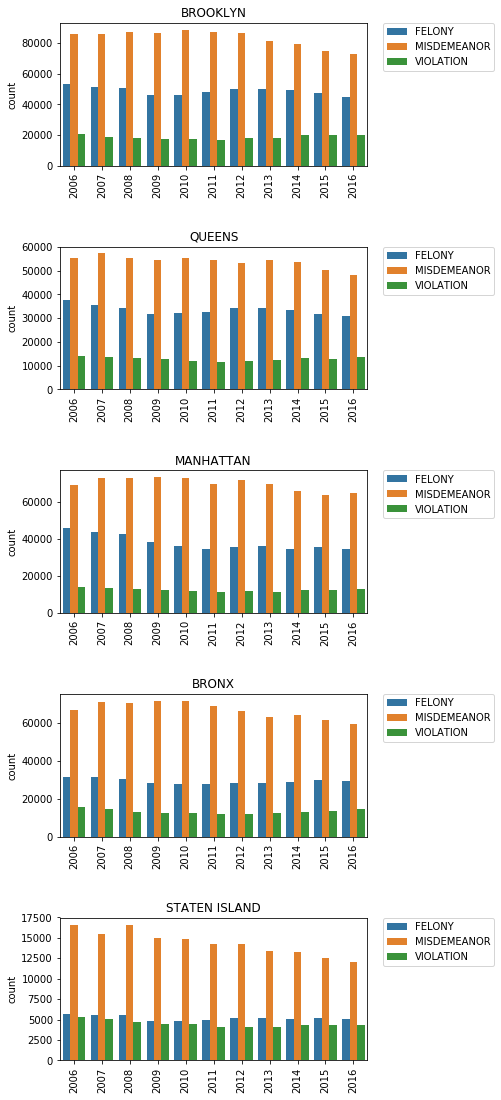

In [8]:
#count plot by borough by year by crime category
f, axs = plt.subplots(5, 1, figsize=(5, 15))
plt.tight_layout(h_pad=6.0)

for i, ax in enumerate(axs.flat):
    boro = boro_order[i]    
    boro_df = df[df.BORO.str.contains(boro)]
    g = sns.countplot(x="CMPLNT_FR_DATE_YEAR", hue="LAW_CAT_CD",
              data=boro_df, ax = ax)
    g.set_title(boro)
    g.set_xlabel('')
    g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    g.set_xticklabels(ax.get_xticklabels(),rotation=90)

Misdemeanor makes up the majority of crimes in all boroughs. Misdemeanor and Felony crimes have different trends over time in most boroughs.

** View monthly trends for 2016 **

Text(0.5,1,'2016 Total Reported Crime by Borough by Month')

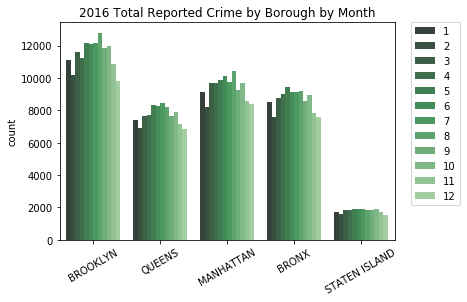

In [9]:
#view trend by month for 2016
df_2016 = df[df.CMPLNT_FR_DATE.dt.year == 2016]

#count plot by borough by year
sns.countplot(x="BORO", hue="CMPLNT_FR_DATE_MONTH",
              data=df_2016, palette='Greens_d',order = boro_order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('')
plt.xticks(rotation=30) 
plt.title('2016 Total Reported Crime by Borough by Month')

There appears to be a seasonal component to crime

** Look at offenses in more detail **  
KY_CD: Three digit offense classification code  
OFNS_DESC: Description of offense corresponding with key code  
  
PD_CD: Three digit internal classification code (more granular than Key Code)  
PD_DESC: Description of internal classification corresponding with PD code (more granular than Offense Description)  

In [10]:
#look at more detailed categories - top 5 for felony
df_fel = df[df.LAW_CAT_CD == 'FELONY']
df_mis = df[df.LAW_CAT_CD == 'MISDEMEANOR']
df_vio = df[df.LAW_CAT_CD == 'VIOLATION']

In [42]:
#create charts by felony type function
def top_5_plot_func(df_type,crime_type):
    f, axs = plt.subplots(5, 1, figsize=(5, 15))
    plt.tight_layout(h_pad=6.0)

    for i, ax in enumerate(axs.flat):
        boro = boro_order[i]    
        boro_df = df_type[df_type.BORO.str.contains(boro)]
        g = sns.countplot(y="OFNS_DESC", hue="CMPLNT_FR_DATE_YEAR",
                   data=boro_df, palette='Greens_d', ax=ax,
                   order=boro_df[boro_df.CMPLNT_FR_DATE_YEAR == 2016].OFNS_DESC.value_counts().iloc[:5].index)
        g.set_title(boro + ' (Top 5 ' + crime_type + ')' )
        g.set_xlabel('')
        g.set_ylabel('')
        g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

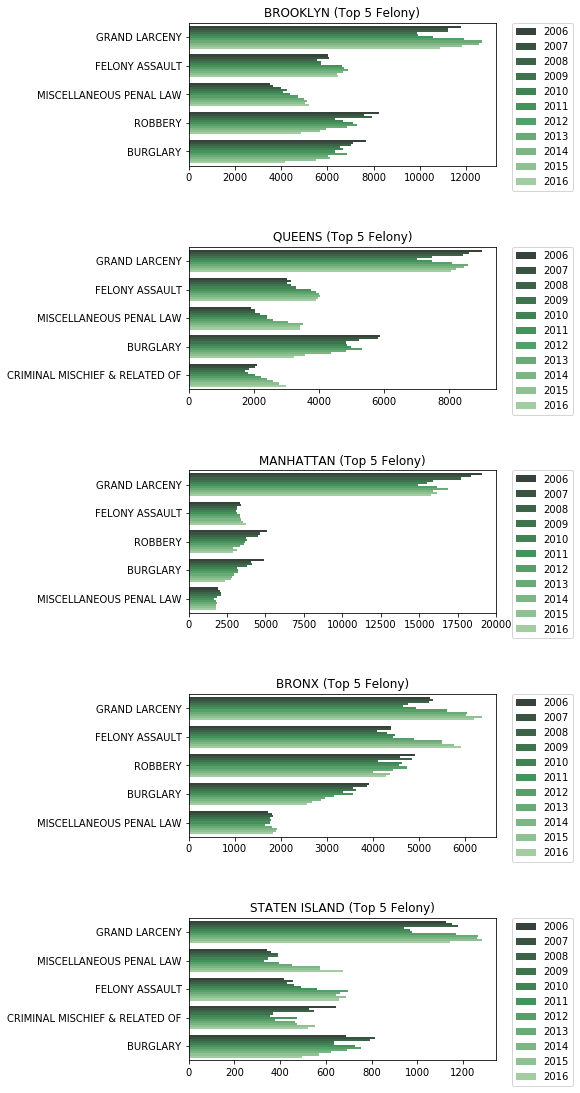

In [43]:
#create charts of top 5 felonies by borough (based on 2016 ranking)
top_5_plot_func(df_fel,'Felony')

- Grand Larceny is the most frequent felony in all boroughs, and intially declined before spiking again in most boroughs.    
- Felony assault appears in the top 5 for all boroughs (top 2 for all except Staten Island) and is above 2006 levels in all.    
- Burglary and Robbery also appear in the top 5 for all boroughs, but appear to have generally trended down in most boroughs.  
- These would all be signficant concerns for anyone looking to rent or buy in a neighborhood, and they'd want to pay close attention to these trends for a specific location.

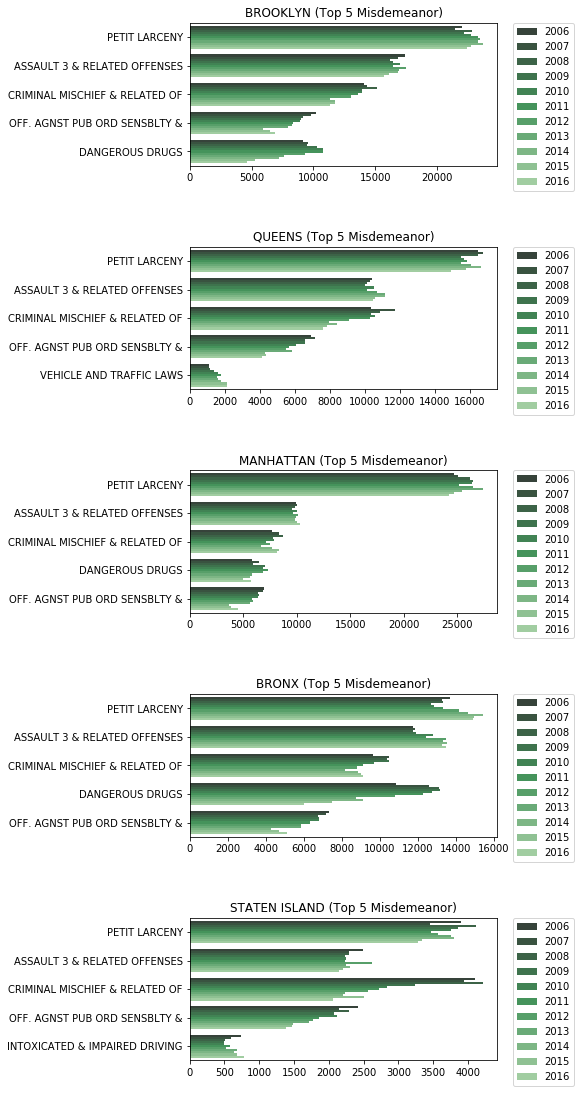

In [44]:
#create charts of top 5 misdemeanors by borough (based on 2016 ranking)
top_5_plot_func(df_mis,'Misdemeanor')

- Petit Larceny is the most frequent Misdemeanor in all boroughs, trends vary by borough, but it has increased considerably in the Bronx, This is a trend that anyone thinking about moving to the Bronx will want to consider, at the neighborhood level.  
- Assault 3 is the second most frequent in all boroughs. The Bronx has seen significant increases since 2006.

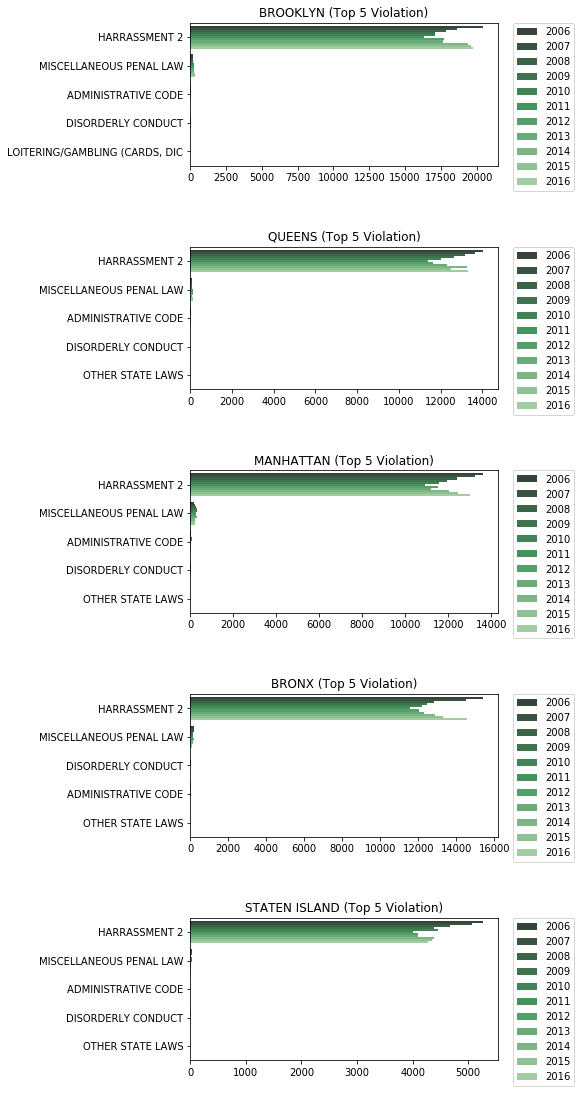

In [33]:
#create charts of top 5 violations by borough (based on 2016 ranking)
top_5_plot_func(df_vio,'Violation')

- Harrassment is by far the most common violation in all boroughs, dwarfing all other violations. It trended down in all boroughs before trending back up for the last few years. This can be a significant quality of life concern, especially given the high frequency of the offense, and prospective renters and buyers will want to look closely at this trend in specific locations.

In [39]:
vio_agg = df_vio[['BORO','OFNS_DESC','CMPLNT_NUM']].groupby(['BORO','OFNS_DESC'],as_index = False).agg(['count'])
vio_agg.columns = ['_'.join(tup).rstrip('_') for tup in vio_agg.columns.values]
vio_agg.reset_index(col_level=1,inplace = True)

In [41]:
vio_agg.sort_values(['BORO','CMPLNT_NUM_count'],ascending=False)

,BORO,OFNS_DESC,CMPLNT_NUM_count
54,STATEN ISLAND,HARRASSMENT 2,49042
56,STATEN ISLAND,MISCELLANEOUS PENAL LAW,277
52,STATEN ISLAND,ADMINISTRATIVE CODE,52
53,STATEN ISLAND,DISORDERLY CONDUCT,39
58,STATEN ISLAND,OTHER STATE LAWS,11
55,STATEN ISLAND,"LOITERING/GAMBLING (CARDS, DIC",2
57,STATEN ISLAND,NEW YORK CITY HEALTH CODE,1
59,STATEN ISLAND,UNDER THE INFLUENCE OF DRUGS,1
60,STATEN ISLAND,UNLAWFUL POSS. WEAP. ON SCHOOL,1
41,QUEENS,HARRASSMENT 2,139920
